Text(0.5, 0.98, 'Maximum and minimum estimates of California residents affected by PG&E emergency outages, October 2019')

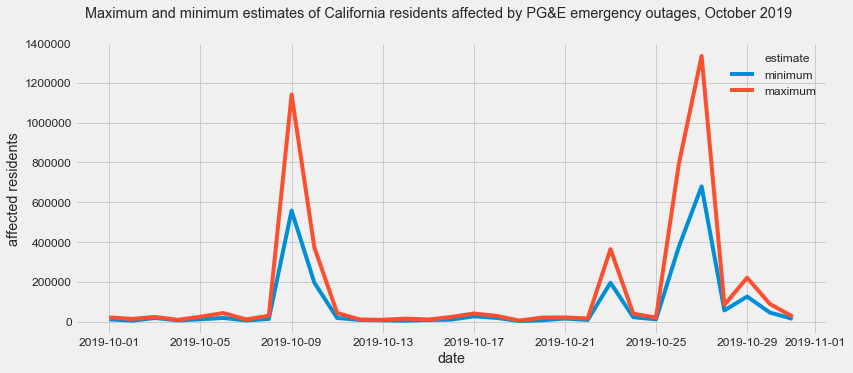

In [142]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Read in data
outages = pd.read_csv('outages_expanded.csv')

# Convert data to datetime and filter for October 2019
outages.earliest = [dt.datetime.fromtimestamp(x) for x in outages.earliest]
outages = outages[(outages.earliest >= '10/1/2019') & (outages.earliest < '11/1/2019')]

# Resample and organize date for trendlines
daily = outages.resample('D', on='earliest').sum()
daily = daily.rename(columns={'min_estCustAffected':'minimum', 
                              'max_estCustAffected':'maximum'})
daily['date'] = daily.index
daily = pd.melt(daily[['date','minimum', 'maximum']], id_vars='date', var_name='estimate')

# Plot using Seaborn
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(12,5))
lineplot = sns.lineplot(x=daily.date, y=daily.value, hue=daily.estimate)
ax.set(xlabel='date', ylabel='affected residents')
fig.suptitle('Maximum and minimum estimates of California residents \
affected by PG&E emergency outages, October 2019.')